# Import Libraries and Setup

In [1]:
# plotting
import matplotlib.pyplot as plt

# manipulate data
import pandas as pd

# more plotting
import seaborn as sns

# custom functions
from gtrends import og_get_daily_trend as get_daily_trend

# library to access google trends
from pytrends.request import TrendReq

# make pandas types compatibile with matplotlib
pd.plotting.register_matplotlib_converters()

# change pandas plotting backend
pd.options.plotting.backend = "plotly"

# create a dictionary to unpack to update plotly plots settings
# why can't it be as easy as with ggplot...
plotly_dict = dict(
    font_family="Yanone Kaffeesatz",
    template="none",
    title={"x": 0.05, "xanchor": "left"},
)

sns.set_style(style="darkgrid", rc={"axes.facecolor": "0.9", "grid.color": "0.8"})
sns.set_palette(palette="deep")
%matplotlib inline

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100

# Create Functions

In [2]:
from typing import Any, List


def query_data(keyword: str, overlap: List[int], trendreq: Any, start: str, end: str):
    """Retrieves data form Google Trends"""
    for window in overlap:
        yield get_daily_trend(
            trendreq, keyword=keyword, start=start, end=end, overlap=window
        )


def create_df(first_trend, second_trend, kw: str):
    """Creates a DataFrame from Google Trend 'queries'"""
    return pd.merge(
        first_trend.drop(["overlap"], axis=1),
        second_trend.drop(["overlap"], axis=1),
        left_index=True,
        right_index=True,
    ).rename(
        columns={
            f"{kw}_x": f"{kw.lower().replace(' ', '_')}_30",
            f"{kw}_y": f"{kw.lower().replace(' ', '_')}_100",
        }
    )


def get_data(
    keyword: str,
    overlap: List[int],
    trendreq: Any,
    start: str,
    end: str,
    save_csv: bool = True,
):
    """Combines query_data and create_df"""
    series1, series2 = query_data(
        keyword=keyword, overlap=overlap, trendreq=trendreq, start=start, end=end
    )

    df = create_df(first_trend=series1, second_trend=series2, kw=keyword)

    if save_csv:
        df.to_csv(f"./data/{keyword.lower().replace(' ', '_')}.csv")

    return df


def make_comparison_plot(
    keyword: str,
    df: pd.DataFrame,
    lags: List[int],
    save_fig: bool = True,
):
    """Plots two overlapping windows"""

    fig, ax = plt.subplots()

    def make_plot(data, col, lag, ax):
        sns.lineplot(
            x=data.index, y=col, data=data, alpha=0.5, label=f"{lag} days lag", ax=ax
        )

    make_plot(data=df, col=df.columns[0], lag=lags[0], ax=ax)
    make_plot(data=df, col=df.columns[1], lag=lags[1], ax=ax)

    plt.suptitle(f"{keyword} Google Trend Volume, 30 and 100 days overlap")

    if save_fig:
        fig.savefig(f"./figures/{keyword.lower().replace(' ', '_')}.png")

    return fig, ax

# Define Starting Parameters

In [3]:
# define request item to "query" google trends "API"
pytrend = TrendReq()

# keywords to search
keywords = ["Mario Draghi", "Christine Lagarde", "Euro", "European Central Bank"]

# start and end data
start_date = "2012-01-01"
end_date = "2021-05-31"

# overlapping window sizes
windows = [30, 100]

# Test the Functions

In [4]:
draghi_test = get_data(
    keyword="Mario Draghi",
    overlap=windows,
    trendreq=pytrend,
    start=start_date,
    end=end_date,
    save_csv=False,
)

In [5]:
draghi_test.head()

,mario_draghi_30,mario_draghi_100
date,,
2012-01-01,0.0,0.0
2012-01-02,3.0,1.0
2012-01-03,5.0,1.0
2012-01-04,1.0,1.0
2012-01-05,1.0,0.0


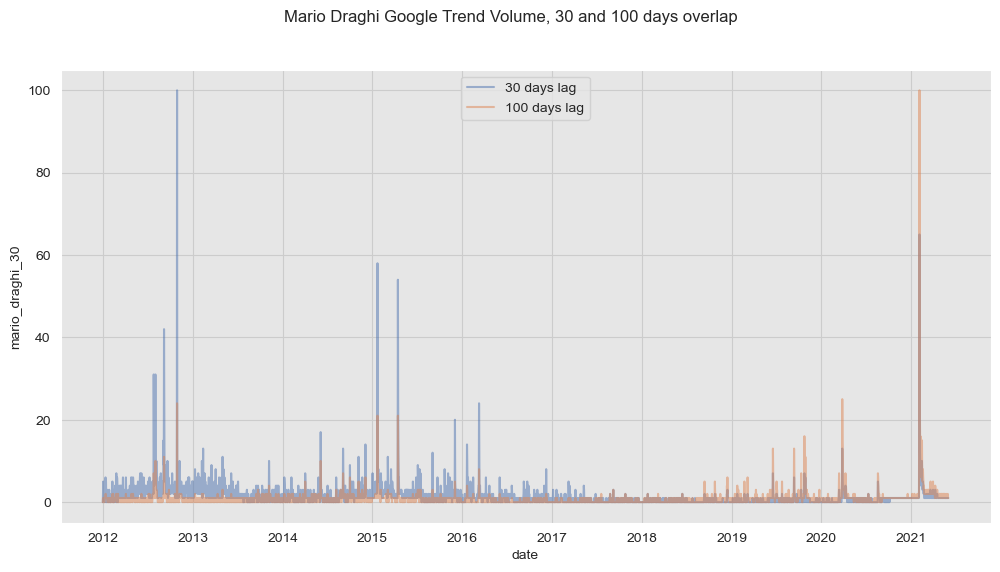

In [7]:
fig, ax = make_comparison_plot(
    keyword="Mario Draghi", df=draghi_test, lags=windows, save_fig=False
)

# fig.savefig("./figures/draghi_problem.png")

It works! Let's use it at scale with all other keywords.

# Get the Data

## Mario Draghi

In [1]:
draghi = get_data(
    keyword=keywords[0],
    overlap=windows,
    start=start_date,
    end=end_date,
    trendreq=pytrend,
    save_csv=True,
)

make_comparison_plot(keyword=keywords[0], df=draghi, lags=windows, save_fig=True)

plt.plot()

NameError: name 'get_data' is not defined

## Christine Lagarde

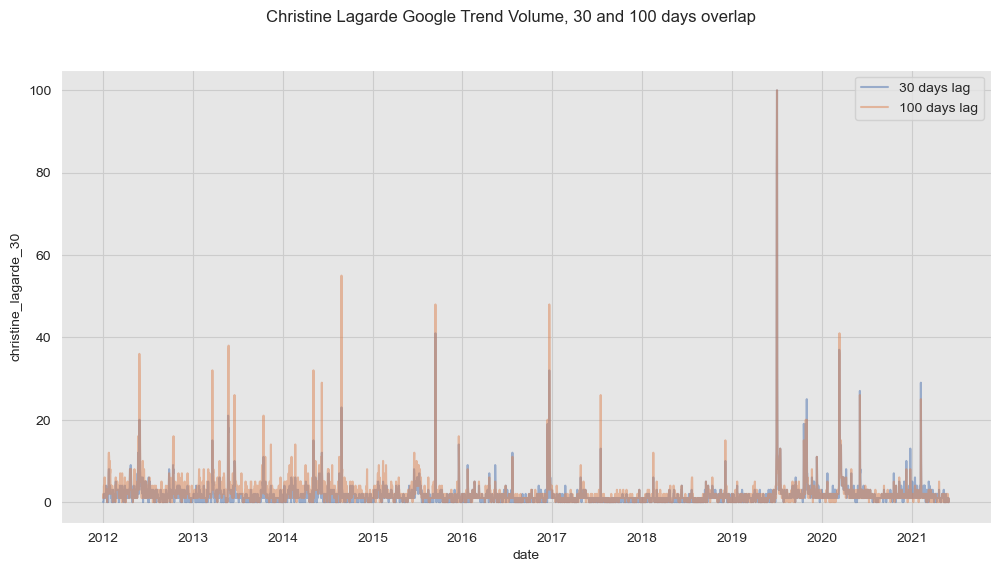

In [11]:
lagarde = get_data(
    keyword=keywords[1],
    overlap=windows,
    start=start_date,
    end=end_date,
    trendreq=pytrend,
    save_csv=True,
)

make_comparison_plot(keyword=keywords[1], df=lagarde, lags=windows, save_fig=True);

## Euro

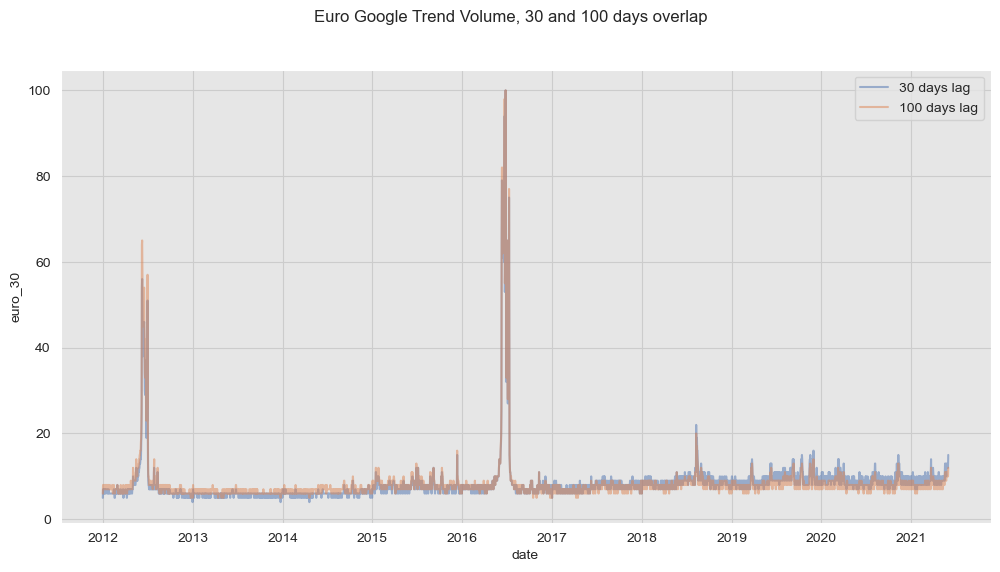

In [12]:
euro = get_data(
    keyword=keywords[2],
    overlap=windows,
    start=start_date,
    end=end_date,
    trendreq=pytrend,
    save_csv=True,
)

make_comparison_plot(keyword=keywords[2], df=euro, lags=windows, save_fig=True);

## ECB

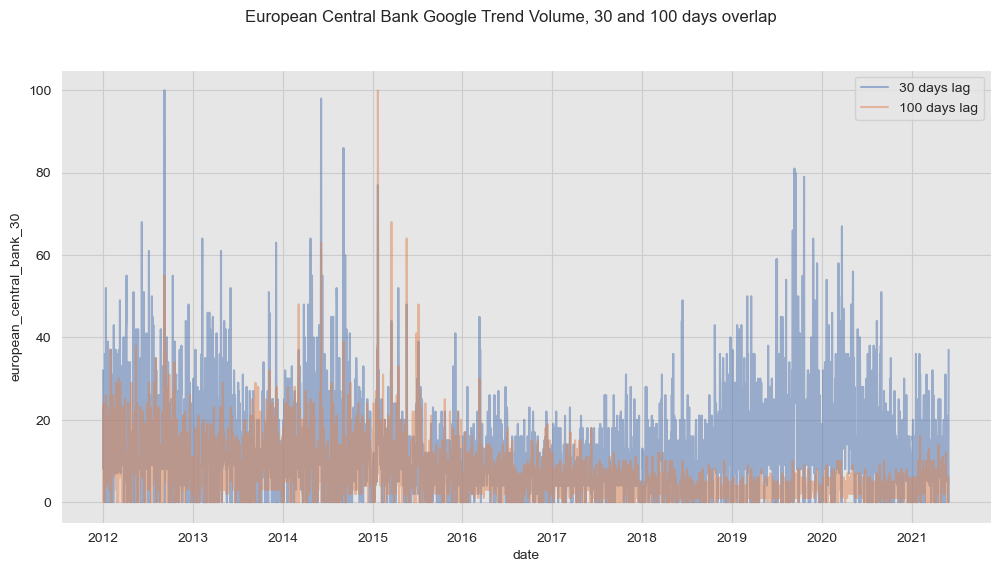

In [13]:
ecb = get_data(
    keyword=keywords[3],
    overlap=windows,
    start=start_date,
    end=end_date,
    trendreq=pytrend,
    save_csv=True,
)

make_comparison_plot(keyword=keywords[3], df=ecb, lags=windows, save_fig=True);

## Benchmark: Bitcoin

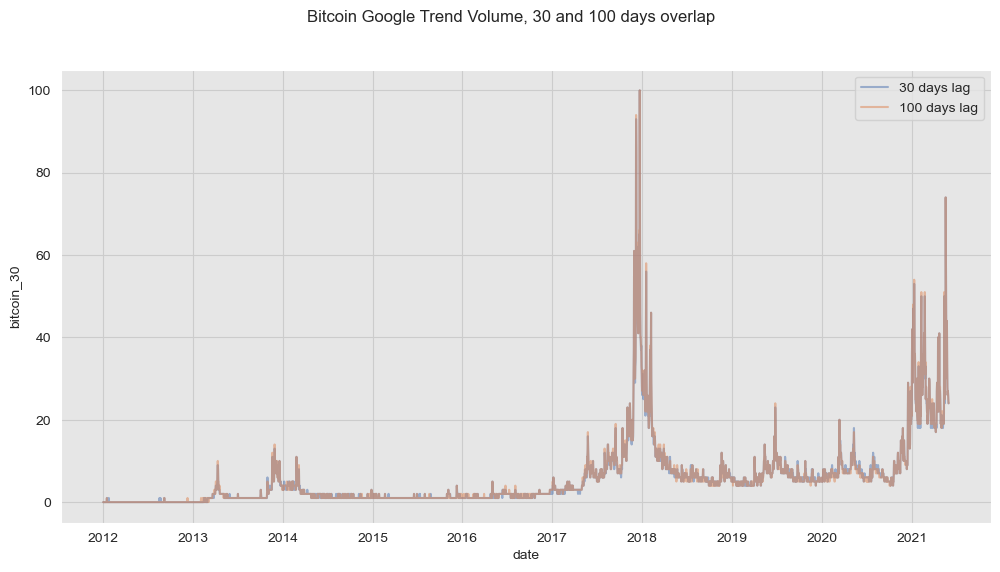

In [17]:
bitcoin = get_data(
    keyword="Bitcoin",
    overlap=windows,
    start=start_date,
    end=end_date,
    trendreq=pytrend,
    save_csv=True,
)

make_comparison_plot(keyword="Bitcoin", df=bitcoin, lags=windows, save_fig=True);